## Library

Kumpulan library yang digunakan untuk membantu

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score

## Information Data

Data berisi informasi terkait pelanggan kartu kredit di suatu negara pada periode Januari-Maret 2015. Informasi meliputi latar belakang pelanggan, jumlah tagihan, jumlah pembayaran, lama terlambat bayar dan status pembayaran bulan berikutnya (April 2015).

## Tujuan

Memprediksi apakah pelanggan kartu kredit beresiko terlambat bayar pada bulan Mei berdasarkan data pada bulan Februari-April 2015 pada data testing.

## Deskripsi Feature

Terdapat 16 peubah yang terdiri dari ID, 14 prediktor dan 1 target.

1. ID Nomor-urut
                                                character
2. AGE Umur
                                                Kontinyu(tahun)
3. LIMIT_BAL-Batas maksimal kredit
                                                Kontinyu(USD)
4. EDUCATION-Tingkat pendidikan 
                                                Kategorik
                                                1: S2/S3
                                                2: Dipl/S1
                                                3: SMA
                                                4: Lainnya
5. MARRIAGE-Status pernikahan 
                                                Kategorik
                                                1: Belum Menikah
                                                2: Menikah
                                                3: Lainnya
6. SEX-kelamin 
                                                Kategorik
                                                1: Pria
                                                2: Wanita
7. PAY_1 … 3-Tepat waktu? 
                                                Kategorik
                                                0: Tepat waktu
                                                1: Terlambat 1 bulan, dst
8. BILL_AMT1 … 3-Tagihan kredit 
                                                Kontinyu (USD)
9. PAY_AMT1 …3-Yang dibayarkan 
                                                Kontinyu (USD)
10. TARGET-Terlambat? 
                                                Kategorik
                                                1: Terlambat
                                                0: Tidak terlambat

## Read Data 

Tahap untuk membaca data yang berformat .csv

In [53]:
df_data = pd.read_csv('training.csv',index_col='ID')
df_test = pd.read_csv('testing.csv',delimiter=';',index_col='ID')

In [54]:
df_data.shape

(16625, 15)

In [55]:
df = pd.concat([df_data,df_test])

In [56]:
df.shape

(33250, 15)

## EDA (Exploratory Data Analysis)

Melakukan proses EDA terhadap data credit score.

#### a. Memisahkan beberapa data dengan aturan kartu kredit

Pada umumnya, bank penerbit kartu kredit memberlakukan beberapa syarat utama untuk pengajuan kartu kredit, di antaranya adalah:

1. Penghasilan minimum setahun: Rp 36 juta

2. Usia minimum pemegang kartu utama: 21 tahun

3. Usia minimum pemegang kartu tambahan: 17 tahun

4. Usia maksimum: 65 tahun

ref: [link](https://www.pilihkartu.com/informasi-kartu-kredit/batas-usia-minimal-memiliki-kartu-kredit)

In [57]:
df_age = df[(df.AGE <= 65) & (df.AGE >=21)]

In [58]:
df_age[16534:16535]

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,EDUCATION,LIMIT_BAL,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_AMT1,PAY_AMT2,PAY_AMT3,SEX,TARGET
ID,,,,,,,,,,,,,,,
1,40,24430.0,23881.0,24234.0,1,30000.0,1,0,0,0,1600.0,1287.0,1296.0,2,NaN


In [59]:
df_age.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,EDUCATION,LIMIT_BAL,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_AMT1,PAY_AMT2,PAY_AMT3,SEX,TARGET
ID,,,,,,,,,,,,,,,
1,40,24607.0,24430.0,23881.0,1,30000.0,1,0,0,0,1700.0,1600.0,1287.0,2,0.0
2,41,17040.0,16474.0,17203.0,1,20000.0,1,1,2,0,0.0,1300.0,1500.0,2,0.0
3,36,17332.0,18600.0,17947.0,1,20000.0,1,0,0,0,1580.0,1367.0,1178.0,2,0.0
4,35,2003.0,2948.0,3372.0,1,20000.0,1,0,0,0,1086.0,1000.0,0.0,2,0.0
5,38,171465.0,145196.0,110163.0,1,170000.0,1,0,0,0,18500.0,13998.0,3760.0,2,0.0


In [60]:
df_age.tail()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,EDUCATION,LIMIT_BAL,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_AMT1,PAY_AMT2,PAY_AMT3,SEX,TARGET
ID,,,,,,,,,,,,,,,
16621,56,2500.0,2500.0,2500.0,2,350000.0,1,2,2,2,0.0,0.0,0.0,1,NaN
16622,60,77708.0,79384.0,77519.0,2,380000.0,2,2,2,2,3500.0,0.0,7000.0,1,NaN
16623,56,3356.0,2758.0,20878.0,2,340000.0,2,3,2,0,0.0,22000.0,4200.0,1,NaN
16624,61,78379.0,76304.0,52774.0,1,430000.0,1,0,0,0,3409.0,1178.0,1926.0,1,NaN
16625,61,48905.0,49764.0,36535.0,2,410000.0,1,0,0,0,1800.0,1430.0,1000.0,1,NaN


In [61]:
df_age.describe()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,EDUCATION,LIMIT_BAL,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_AMT1,PAY_AMT2,PAY_AMT3,SEX,TARGET
count,33068.000000,33068.000000,33068.000000,33068.000000,33068.000000,33068.000000,33068.000000,33068.000000,33068.000000,33068.000000,33068.000000,33068.000000,33068.000000,33068.000000,16534.000000
mean,43.248579,49768.101972,47650.053587,44729.166233,2.116971,156867.424701,1.476836,0.453308,0.410941,0.364522,5086.058546,4910.242107,4573.060451,1.589392,0.395972
std,8.621623,72039.111648,69465.136465,65927.409231,0.791424,124718.035605,0.523476,0.856592,0.865090,0.829821,14986.632795,15295.345787,14570.844023,0.491952,0.489073
min,21.000000,-165580.000000,-69777.000000,-65167.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,37.000000,3260.000000,2799.500000,2446.750000,2.000000,50000.000000,1.000000,0.000000,0.000000,0.000000,505.750000,390.000000,214.750000,1.000000,0.000000
50%,42.000000,21476.500000,20386.000000,19509.000000,2.000000,120000.000000,1.000000,0.000000,0.000000,0.000000,2000.000000,1900.000000,1500.000000,2.000000,0.000000
75%,49.000000,64350.250000,60732.500000,56592.500000,3.000000,230000.000000,2.000000,0.000000,0.000000,0.000000,4881.250000,4360.000000,4000.000000,2.000000,1.000000
max,65.000000,746814.000000,693131.000000,693131.000000,4.000000,800000.000000,3.000000,4.000000,4.000000,4.000000,505000.000000,508229.000000,508229.000000,2.000000,1.000000


In [62]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33068 entries, 1 to 16625
Data columns (total 15 columns):
AGE          33068 non-null int64
BILL_AMT1    33068 non-null float64
BILL_AMT2    33068 non-null float64
BILL_AMT3    33068 non-null float64
EDUCATION    33068 non-null int64
LIMIT_BAL    33068 non-null float64
MARRIAGE     33068 non-null int64
PAY_1        33068 non-null int64
PAY_2        33068 non-null int64
PAY_3        33068 non-null int64
PAY_AMT1     33068 non-null float64
PAY_AMT2     33068 non-null float64
PAY_AMT3     33068 non-null float64
SEX          33068 non-null int64
TARGET       16534 non-null float64
dtypes: float64(8), int64(7)
memory usage: 4.0 MB


### Change Type Column

Melakukan perubahan pada tipe data beberapa kolom.

In [63]:
df_age['EDUCATION'] = df_age['EDUCATION'].astype('str')
df_age['MARRIAGE'] = df_age['MARRIAGE'].astype('str')
df_age['PAY_1'] = df_age['PAY_1'].astype('str')
df_age['PAY_2'] = df_age['PAY_2'].astype('str')
df_age['PAY_3'] = df_age['PAY_3'].astype('str')
df_age['SEX'] = df_age['SEX'].astype('str')

C:\Users\tiorah064123\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\tiorah064123\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tiorah064123\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

### Categorical and Numerical List

Melakukan pemisahan kolom yang memiliki tipe kategori dan numerik

In [64]:
# Make a list for both of the data type
categorical_list1 = []
numerical_list1 = []

def check_dtypes_1(df):
    categorical_list = []
    numerical_list = []

    
    '''
    Parameters :
    ------------
    df : Dataframe name 

    Step :
    ------
    > 1. Do iteration for each feature to define which one categorical and nummerical feature. 
    > 2. Columns in dataframe will be seperated based on the dtypes
    > 3. All of the column will be entered to the list that have been created

    result :
    --------
    The result will be formed as dataframe
    '''
    #Looping 
    for col in df.columns.tolist():
        if df[col].dtype=='object':
            categorical_list.append(col)
            categorical_list1.append(col)
        else:
            numerical_list.append(col)
            numerical_list1.append(col)
    
    #make dataframe that have two feature, that is categorical and numerical feature
    categorical = pd.Series(categorical_list, name='Categorical Feature')
    numerical = pd.Series(numerical_list, name='Numerical Feature')
    df_dtypes = pd.concat([categorical,numerical], axis=1)
    
    return df_dtypes

In [65]:
check_dtypes_1(df_age)

,Categorical Feature,Numerical Feature
0,EDUCATION,AGE
1,MARRIAGE,BILL_AMT1
2,PAY_1,BILL_AMT2
3,PAY_2,BILL_AMT3
4,PAY_3,LIMIT_BAL
5,SEX,PAY_AMT1
6,NaN,PAY_AMT2
7,NaN,PAY_AMT3
8,NaN,TARGET


### Missing Value

Mengecek missing value pada dataset

In [66]:
# module Check missing value 
def missing_value(df):
    '''
    Documentation :
    --------------
    * df : Dataframe Name
    '''
    #count the number of missing value 
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum()/len(df)*100,2).sort_values(ascending = False)
    missing  = pd.concat([total, percent], axis=1, keys=['Total_Missing', 'Percent(%)'])
    
    return missing.head(20)

In [67]:
missing_value(df_age)

,Total_Missing,Percent(%)
TARGET,16534,50.0
SEX,0,0.0
PAY_AMT3,0,0.0
PAY_AMT2,0,0.0
PAY_AMT1,0,0.0
PAY_3,0,0.0
PAY_2,0,0.0
PAY_1,0,0.0
MARRIAGE,0,0.0
LIMIT_BAL,0,0.0


In [68]:
#Univariat Analisys
def Univariate_plot(df, column, vartype, hue = None ):
    '''
    Documentation :
    Univariate function will plot the graphs based on the parameters.
    * df      : dataframe name
    * column  : Column name
    * vartype : variable type : continuos or categorical
                (0) Continuos/Numerical   : Distribution, Violin & Boxplot will be plotted.
                (1) Categorical           : Countplot will be plotted.
    * hue     : It's only applicable for categorical analysis.
    '''
    sns.set(style="darkgrid")
      
    if vartype == 0:
        fig, ax=plt.subplots(nrows = 3, ncols=1,figsize=(12,12))
        # Distribution Plot
        ax[0].set_title("Distribution Plot",fontsize = 10)
        sns.distplot(df[column], kde=False, fit=stats.gamma, color='darkblue', label = column, ax=ax[0])
        
        # Violinplot 
        ax[1].set_title("Violin Plot",fontsize = 10)
        sns.violinplot(data= df, x=column, color = 'limegreen', inner="quartile", orient='h', ax=ax[1])
        
        #Boxplot
        ax[2].set_title("Box Plot",fontsize = 10)
        sns.boxplot(data =df, x=col,color='cyan',orient="h",ax=ax[2])
        
        fig.tight_layout()
        
    if vartype == 1 :
        #Count plot 
        fig = plt.figure(figsize=(12,6))
        plt.title('Count Plot',fontsize = 20)
        ax=sns.countplot(data=df, x=column, palette="Blues_r")
        ax.set_xlabel(column, fontsize = 15)
        ax.tick_params(labelsize=12)

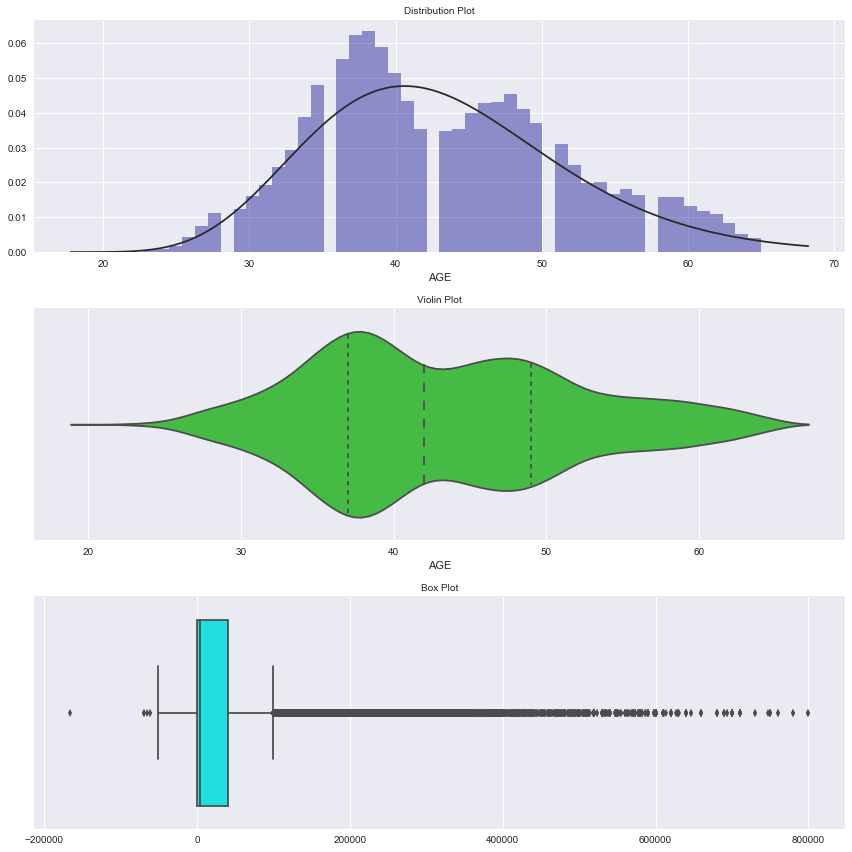

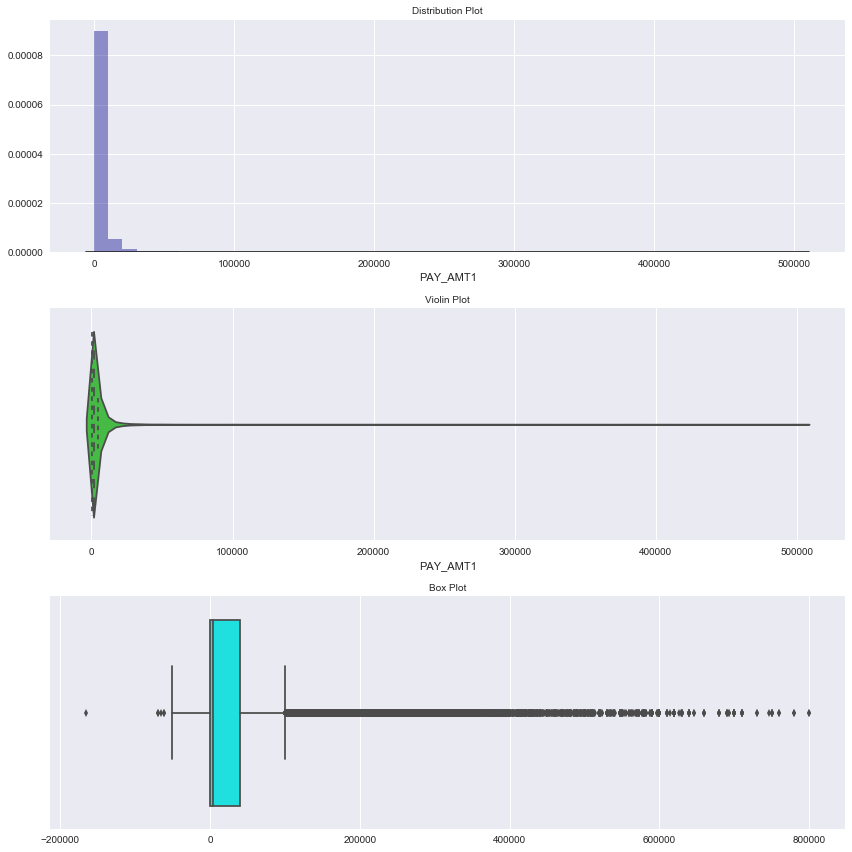

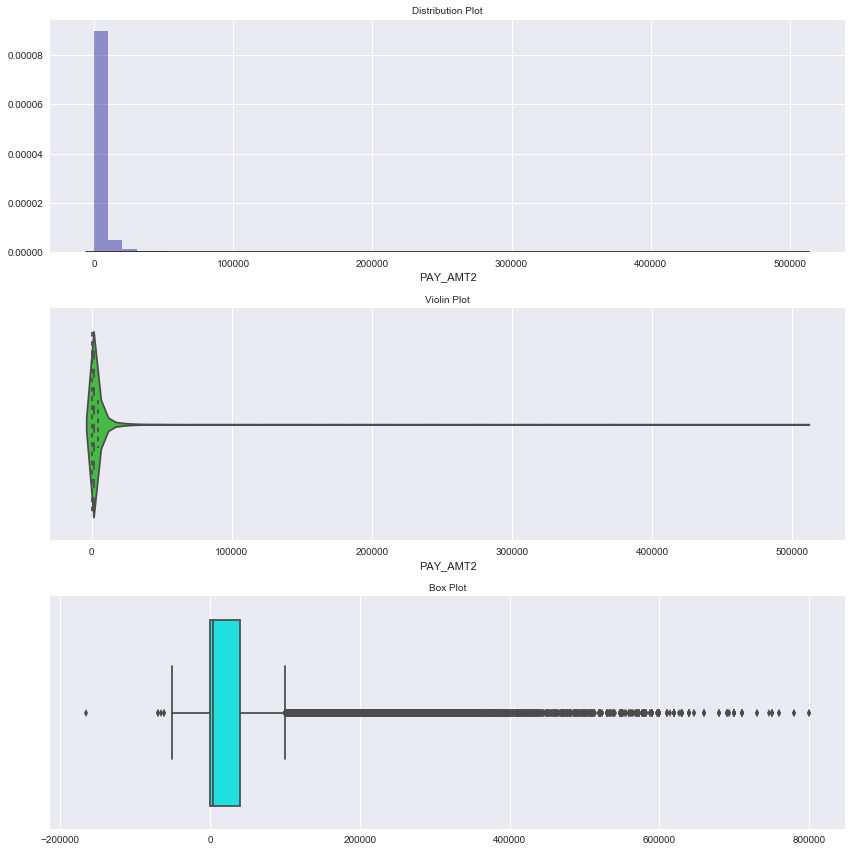

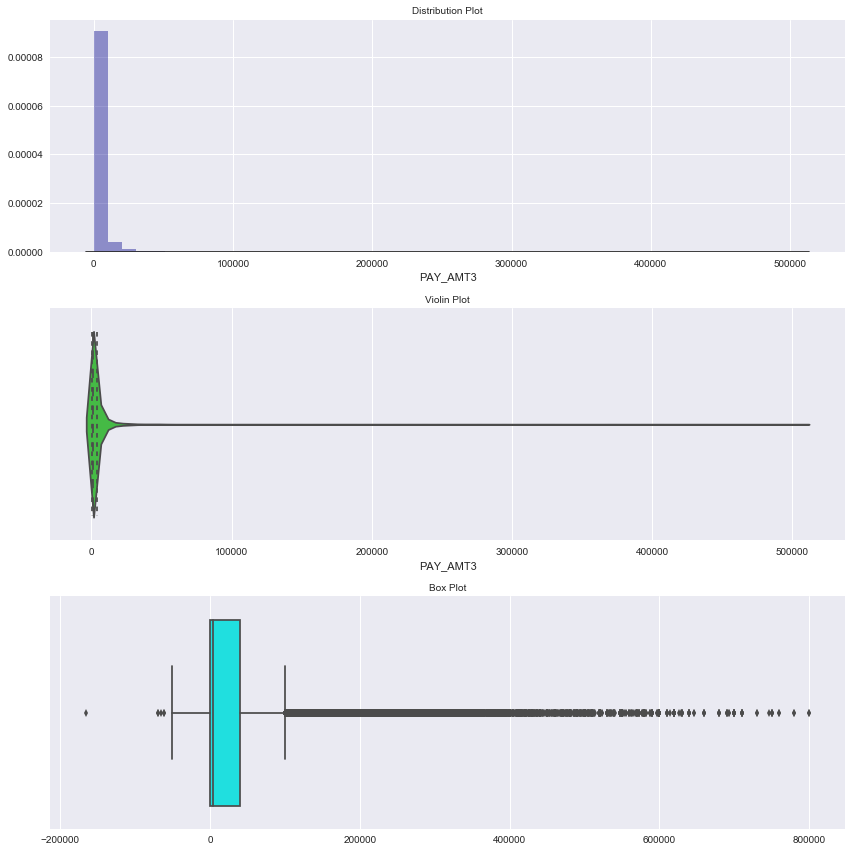

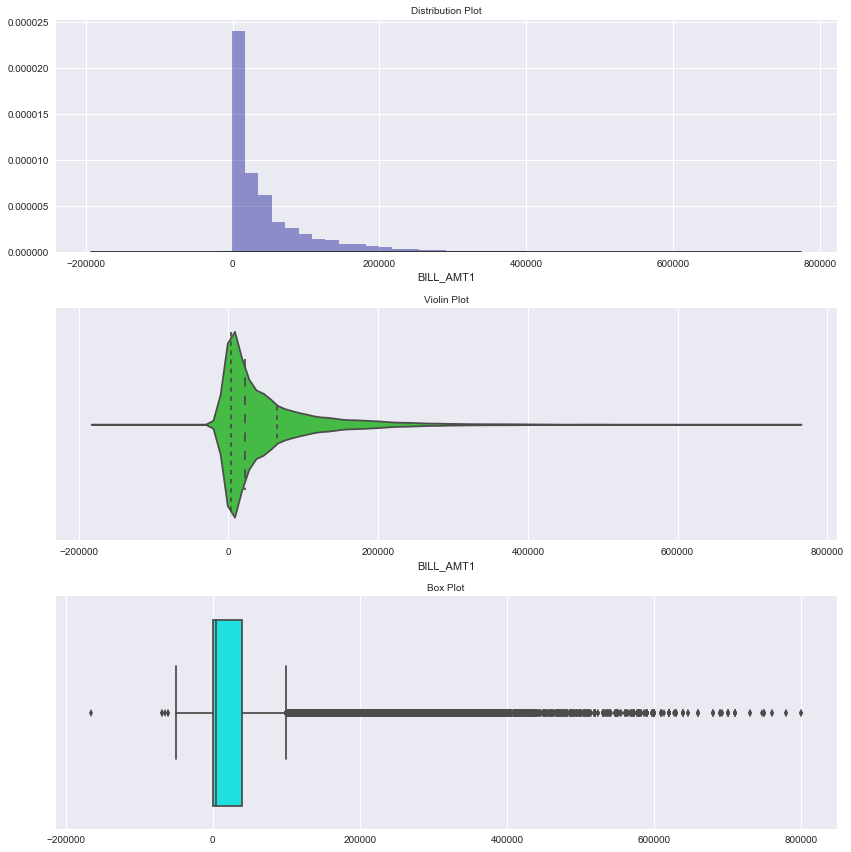

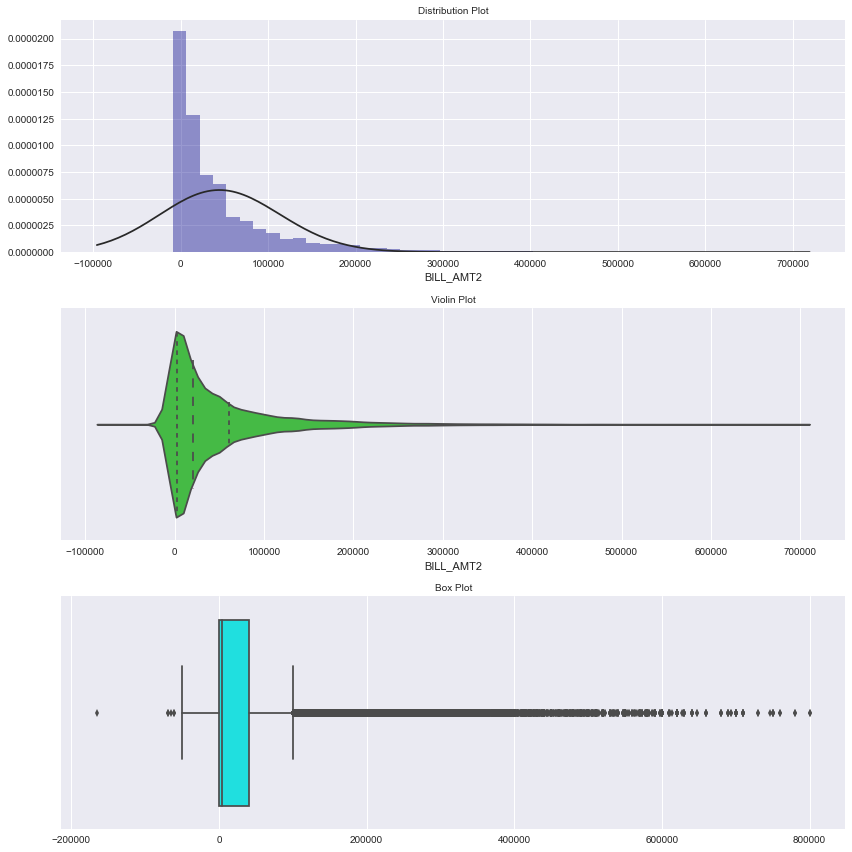

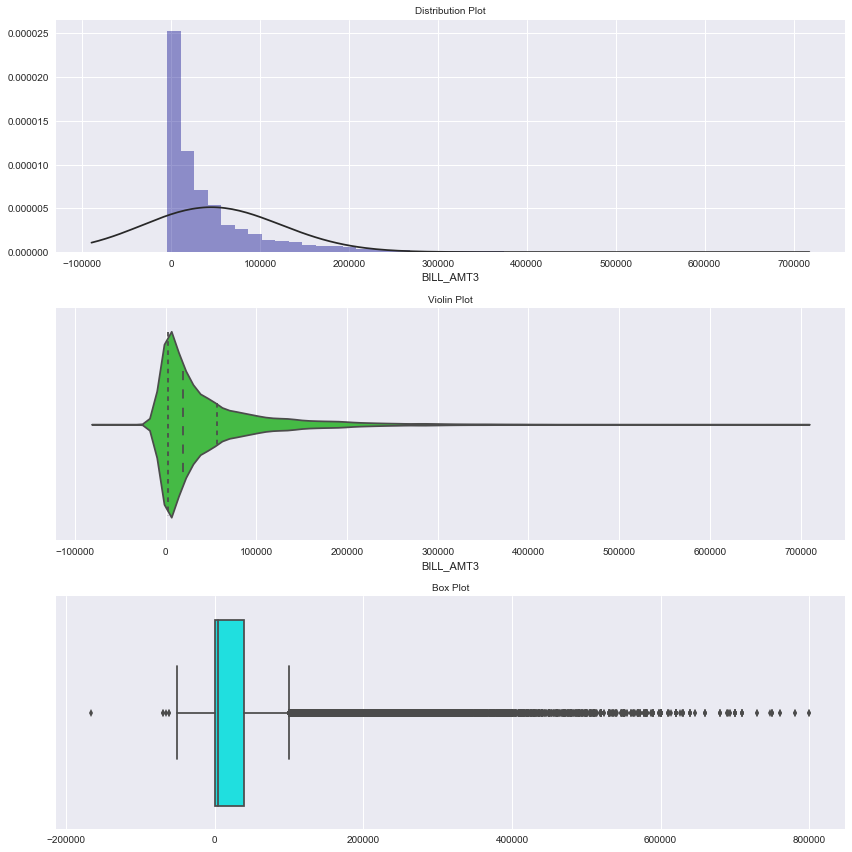

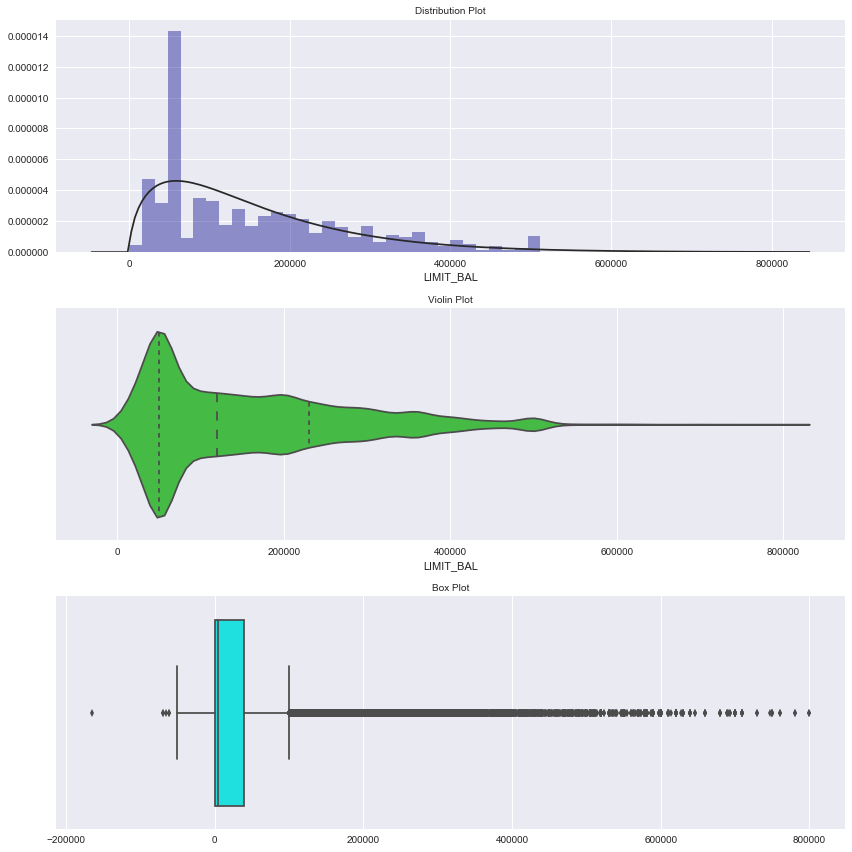

In [69]:
# 1. Define Dataframe
dataframe = df_age

# 2. Define feature
col = ['AGE','PAY_AMT1','PAY_AMT2','PAY_AMT3','BILL_AMT1','BILL_AMT2','BILL_AMT3','LIMIT_BAL']

# 3. Vartype 
var_type = 0   
 
#Visualization
for x in range(len(col)):
    Univariate_plot(df=dataframe,column = col[x], vartype = var_type )

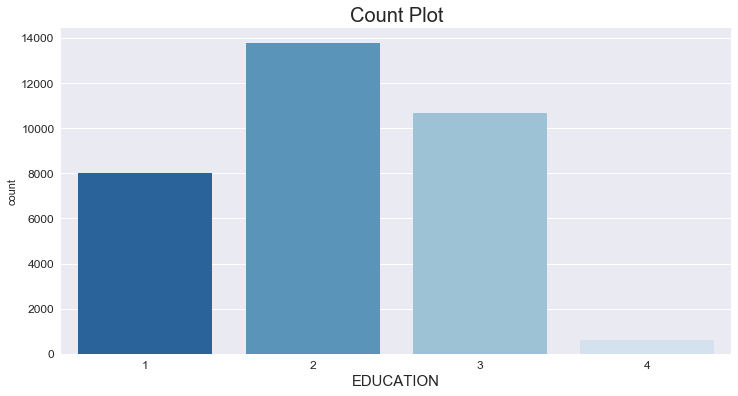

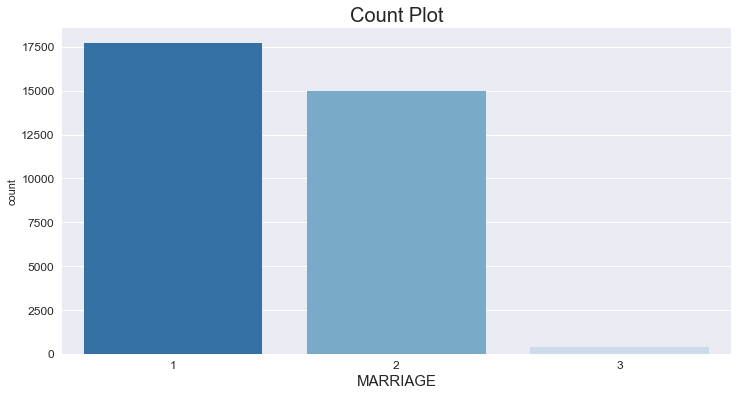

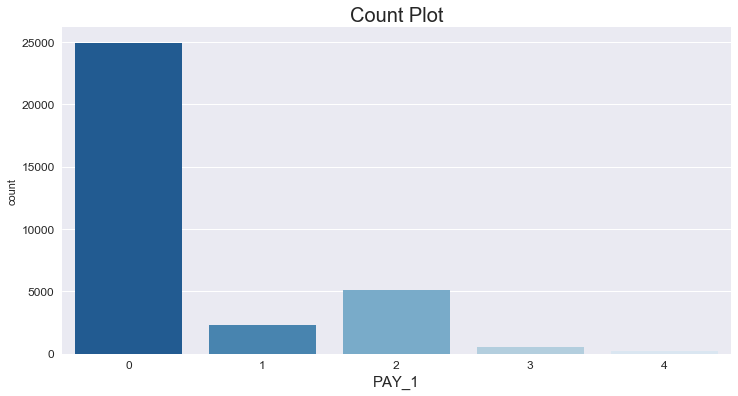

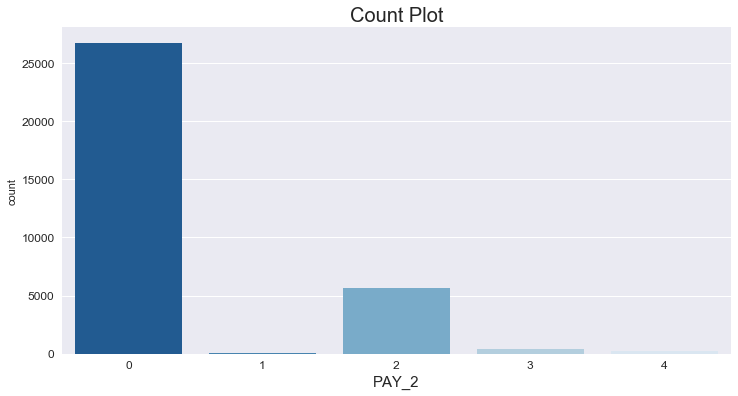

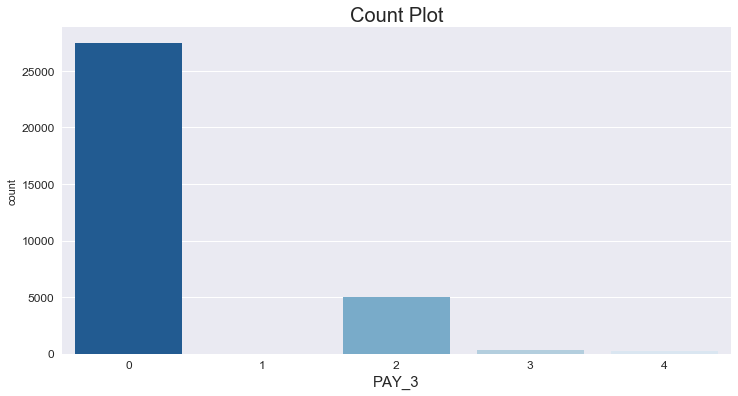

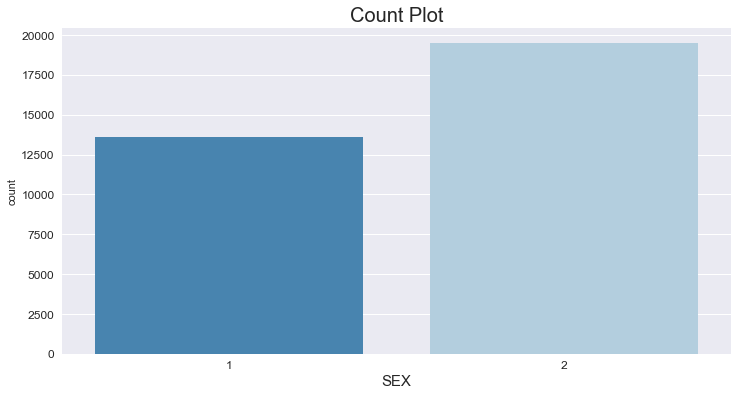

In [70]:
# 1. Define Dataframe
dataframe = df_age

# 2. Define feature
col = categorical_list1

# 3. Vartype 
var_type = 1   
 
#Visualization
for x in range(len(col)):
    Univariate_plot(df=dataframe,column = col[x], vartype = var_type )

### Get_dummies from data

Melakukan pemisahan kolom pada data yang bernilai ordinal. Get dummies menggunakan pendekatan label encoder.

In [111]:
df1 = pd.get_dummies(df_age, drop_first=True)

In [112]:
df1.columns

Index(['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'LIMIT_BAL', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'TARGET', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_1', 'PAY_1_2',
       'PAY_1_3', 'PAY_1_4', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'SEX_2'],
      dtype='object')

In [110]:
df1.columns

Index(['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'LIMIT_BAL', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'TARGET', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_2_0',
       'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_3_0', 'PAY_3_1',
       'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'SEX_1', 'SEX_2'],
      dtype='object')

In [109]:
df1.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET,EDUCATION_1,...,PAY_2_2,PAY_2_3,PAY_2_4,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,SEX_1,SEX_2
ID,,,,,,,,,,,,,,,,,,,,,
1,40,24607.000000,24430.000000,23881.000000,30000.000000,1700.000000,1600.000000,1287.000000,0.000000,1,...,0,0,0,1,0,0,0,0,0,1
2,41,17040.000000,16474.000000,17203.000000,20000.000000,0.000000,1300.000000,1500.000000,0.000000,1,...,1,0,0,1,0,0,0,0,0,1
3,36,17332.000000,18600.000000,17947.000000,20000.000000,1580.000000,1367.000000,1178.000000,0.000000,1,...,0,0,0,1,0,0,0,0,0,1
4,35,2003.000000,2948.000000,3372.000000,20000.000000,1086.000000,1000.000000,0.000000,0.000000,1,...,0,0,0,1,0,0,0,0,0,1
5,38,171465.000000,145196.000000,110163.000000,170000.000000,18500.000000,13998.000000,3760.000000,0.000000,1,...,0,0,0,1,0,0,0,0,0,1


In [73]:
df1 = df1[['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'LIMIT_BAL', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_1', 'PAY_1_2',
       'PAY_1_3', 'PAY_1_4', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'SEX_2', 'TARGET']]

## 3. Model

### 3.1. Logistic Reg

In [74]:
df1_train = df1[:16534]
df1_predict = df1[16535:-1]

In [75]:
df1_train = df1_train.sample(frac=1,random_state=12)

In [76]:
def log_regression(df, ycol = None, alpha = None):
    if alpha == None :
        alpha = 0.05
    #determine y and x variable     
    y = df[ycol]
    x = df.drop([ycol], axis = 1)
    #regression logistic
    model = sm.Logit(y,x)
    #regression 
    result = model.fit()
    #get p-values
    result             = result.pvalues
    result             = pd.DataFrame(result, columns=['p_value'])
    result.index       = result.index.set_names(['features'])
    #result            = result.reset_index().rename(columns = {result.index.name : 'features'})
    result['alpha']    = alpha
    result['decision'] = np.where(result['p_value'] <= alpha, 'Correlated', 'Not Correlated')
    #result             = result['decision']
    
    return result

In [77]:
result = log_regression(df1_train, ycol = 'TARGET')
result

Optimization terminated successfully.
         Current function value: 0.527465
         Iterations 7


,p_value,alpha,decision
features,,,
AGE,1.415299e-20,0.05,Correlated
BILL_AMT1,1.418498e-04,0.05,Correlated
BILL_AMT2,8.072864e-02,0.05,Not Correlated
BILL_AMT3,1.276133e-01,0.05,Not Correlated
LIMIT_BAL,9.449715e-116,0.05,Correlated
PAY_AMT1,9.233066e-10,0.05,Correlated
PAY_AMT2,7.177550e-04,0.05,Correlated
PAY_AMT3,1.647369e-02,0.05,Correlated
EDUCATION_2,1.418382e-02,0.05,Correlated


In [78]:
logreg_data = df1_train[['AGE', 'BILL_AMT1', 'LIMIT_BAL', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'EDUCATION_2', 'EDUCATION_3',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4',
        'PAY_2_2', 'PAY_2_3', 'PAY_3_2',
       'PAY_3_3', 'SEX_2', 'TARGET']]

Melakukan pengacakan data

In [79]:
logreg_data = logreg_data.sample(frac=1, random_state=12)

In [80]:
X = logreg_data
X_full = df1_train
y = logreg_data.TARGET
y_full = df1_train.TARGET

In [81]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2)
print (X_train_full.shape, y_train_full.shape)
print (X_test_full.shape, y_test_full.shape)

(13227, 27) (13227,)
(3307, 27) (3307,)


In [82]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(13227, 20) (13227,)
(3307, 20) (3307,)


In [83]:
%%time

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# predict the data
y_pred=logreg.predict(X_test)

Wall time: 156 ms


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.70      0.69      0.70      1994
        1.0       0.54      0.56      0.55      1313

avg / total       0.64      0.64      0.64      3307



AUC:  0.6506121563471833


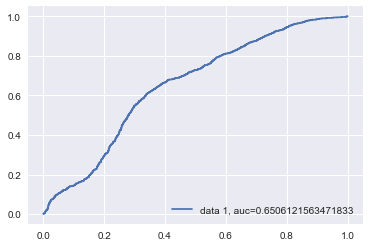

In [85]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
acc_lr = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC: ',acc_lr)
plt.plot(fpr,tpr,label="data 1, auc="+str(acc_lr))
plt.legend(loc=4)
plt.show()

### 3.2 LogisticRegressionCV

In [86]:
from sklearn.linear_model import LogisticRegressionCV

In [87]:
X = logreg_data
y = logreg_data.TARGET

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
arr = [2,3,4,5]
for x in range(len(arr)):
    logregCV = LogisticRegressionCV(cv=arr[x], random_state=0)

# fit the model with data
    logregCV.fit(X_train,y_train)

# do the predict
    y_pred=logregCV.predict(X_test)


# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

    y_pred_proba = logregCV.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    print('CV ke: ',arr[x])
    print('AUC: ',auc)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()

CV ke:  2
AUC:  0.6569202944050182
CV ke:  3
AUC:  0.6569195286824365
CV ke:  4
AUC:  0.6569329288276174
CV ke:  5
AUC:  0.6569283344921268


### 3.3 Support Vector Machine

In [88]:
from sklearn import svm

In [89]:
%%time

clf = svm.SVC()
clf.fit(X_train_full, y_train_full)

y_pred_full=clf.predict(X_test_full)

Wall time: 1min 16s


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test_full, y_pred_full))

             precision    recall  f1-score   support

        0.0       0.61      1.00      0.75      1965
        1.0       0.88      0.05      0.09      1342

avg / total       0.72      0.61      0.48      3307



In [91]:
acc_svm = roc_auc_score(y_test_full, y_pred_full)
acc_svm

0.5219275093571176

### 3.4 Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
X_train_full.columns

Index(['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'LIMIT_BAL', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4',
       'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'SEX_2', 'TARGET'],
      dtype='object')

In [121]:
X_full = df1_train
y_full = df1_train.TARGET

In [124]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2)

In [125]:
%%time

trainedforest = RandomForestClassifier().fit(X_train_full,y_train_full)
predictionforest = trainedforest.predict(X_test_full)

print(classification_report(y_test_full,predictionforest))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      2016
        1.0       1.00      1.00      1.00      1291

avg / total       1.00      1.00      1.00      3307

Wall time: 119 ms


In [126]:
acc_rf = roc_auc_score(y_test_full, predictionforest)
print(acc_rf)

1.0


In [97]:
feature_imp_randomforest= pd.DataFrame(trainedforest.feature_importances_,index = X_train_full.columns,columns=['importance']).sort_values('importance',ascending=False)
pd.set_option('float_format', '{:f}'.format)
feature_imp_randomforest

,importance
TARGET,0.726377
AGE,0.067491
LIMIT_BAL,0.056230
PAY_1_2,0.038511
PAY_2_2,0.026147
PAY_3_2,0.013618
PAY_AMT1,0.009743
BILL_AMT2,0.009363
BILL_AMT1,0.008822
BILL_AMT3,0.007816


Setelah melihat feature important dari random forest, kolom 'PAY_2_1' dan 'PAY_3_1' memiliki nilai improtance yang jauh kecil dibandingkan dengan fitur lainnya. Maka dari itu, kita hilangkan kolom tersebut yang tidak digunakan.

In [127]:
df_rf = df1_train.drop(['PAY_3_1', 'PAY_2_1'], axis=1)

In [128]:
X_rf = df_rf
y_rf = df_rf.TARGET

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2)

In [129]:
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_train_rf,y_train_rf)
predictionforest = trainedforest.predict(X_test_rf)
print(classification_report(y_test_rf, predictionforest))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      1976
        1.0       1.00      1.00      1.00      1331

avg / total       1.00      1.00      1.00      3307



In [130]:
acc_rf_drop = roc_auc_score(y_test_rf, predictionforest)
print(acc_rf_drop)

1.0


## 4. Kesimpulan

### 4.1 Hasil Model

In [131]:
data = {'Algo':['LR w/ feature selection', 'SVM', 'Random Forest', 'Random Forest w/ feature selection'],'AUC':[acc_lr,acc_svm,acc_rf,acc_rf_drop]}
df_eval = pd.DataFrame(data)
df_eval = df_eval[['Algo','AUC']]
df_eval.sort_values(by=['AUC'],ascending=False)

,Algo,AUC
2,Random Forest,1.000000
3,Random Forest w/ feature selection,1.000000
0,LR w/ feature selection,0.650612
1,SVM,0.521928


### 4.2 Kesimpulan

Algoritma Random Forest menggunakan seleksi fitur menghasilkan nilai yang AUC yang sempurna. Ini terjadi kemungkinan karena kesalahan dalam pemilihan fitur atau memang model terlalu fit kepada data. Maka algoritma yang paling mungkin digunakan adalah Logistic Reggresion with feature selection yang memiliki nilai AUC yang tertinggi dibandingkan 3 algoritma lainnya. 